In [1]:
# import packages
import pandas as pd
import numpy as np
import pickle  # for saving and loading models
from lightgbm.sklearn import LGBMRegressor  # for Light GBM
from sklearn.metrics import r2_score  # for R squared
from sklearn.metrics import mean_squared_error as rmse_score  # for root mean squared error
from sklearn.metrics import mean_absolute_error as mae  # for root mean squared error

## Load Models and Data
- The final models are:
  - lgbm_all_data
  - lgbm_using_GA
  - lgbm_using_CA

In [2]:
# functions to save / load pickle objects
def save_obj(obj, filename):
    try:
        with open(filename, "wb") as f:
            pickle.dump(obj, f, protocol=pickle.HIGHEST_PROTOCOL)
    except Exception as ex:
        print("Error:", ex)


def load_obj(filename):
    try:
        with open(filename, "rb") as f:
            return pickle.load(f)
    except Exception as ex:
        print("Error:", ex)


In [3]:
# Model trained using all data
lgbm_all_data = load_obj('../models/lgbm_all_data.pickle')

# Model trained using only data from Georgia
lgbm_using_GA = load_obj('../models/lgbm_using_GA.pickle')

# Model trained using only data from California
lgbm_using_CA = load_obj('../models/lgbm_using_CA.pickle')


In [6]:
# load data
X_train = pd.read_csv('../large_data_files/Train and Valid Data for model comparison/X_train_model2.csv')
y_train = pd.read_csv('../large_data_files/Train and Valid Data for model comparison/y_train_model2.csv')
X_validate = pd.read_csv('../large_data_files/Train and Valid Data for model comparison/X_valid_model2.csv')
y_validate = pd.read_csv('../large_data_files/Train and Valid Data for model comparison/y_valid_model2.csv')

X_train_all = pd.read_csv('../large_data_files/All Data/X_train_all.csv')
y_train_all = pd.read_csv('../large_data_files/All Data/y_train_all.csv')
X_test = pd.read_csv('../large_data_files/All Data/X_test_all.csv')
y_test = pd.read_csv('../large_data_files/All Data/y_test_all.csv')

X_train.drop(columns=['Unnamed: 0'], inplace=True)
y_train.drop(columns=['Unnamed: 0'], inplace=True)
X_validate.drop(columns=['Unnamed: 0'], inplace=True)
y_validate.drop(columns=['Unnamed: 0'], inplace=True)

X_train_all.drop(columns=['Unnamed: 0'], inplace=True)
y_train_all.drop(columns=['Unnamed: 0'], inplace=True)
X_test.drop(columns=['Unnamed: 0'], inplace=True)
y_test.drop(columns=['Unnamed: 0'], inplace=True)

# rename this column which gives an error in LGBM because its name has quotation marks
X_train.rename(columns={'city_"oneals"': 'city_oneals'}, inplace=True)
X_validate.rename(columns={'city_"oneals"': 'city_oneals'}, inplace=True)

X_train_all.rename(columns={'city_"oneals"': 'city_oneals'}, inplace=True)
X_test.rename(columns={'city_"oneals"': 'city_oneals'}, inplace=True)


## Plot Residuals

In [122]:
all_data_results = pd.DataFrame(data={
    'predicted':lgbm_all_data.predict(X_test),
    'actual': y_test.values.ravel(),
    'type': 'test'
})
all_data_results = pd.concat([all_data_results.copy(), pd.DataFrame(data={
    'predicted':lgbm_all_data.predict(X_train_all),
    'actual': y_train_all.values.ravel(),
    'type': 'train'})])

In [123]:
all_data_results['absolute_err'] = abs(all_data_results.actual - all_data_results.predicted)
all_data_results['res'] = all_data_results.actual - all_data_results.predicted

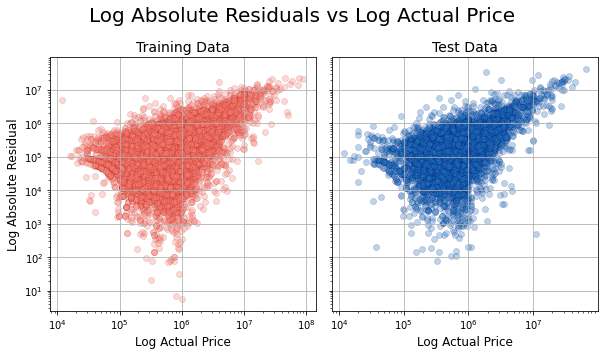

In [178]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,sharey=True, figsize=(8.5,5))
ax[0].scatter(all_data_results[all_data_results.type=='train'].actual, all_data_results[all_data_results.type=='train'].absolute_err,alpha=0.3, c='salmon', edgecolors='firebrick', linewidths=0.5)
ax[1].scatter(all_data_results[all_data_results.type=='test'].actual, all_data_results[all_data_results.type=='test'].absolute_err,alpha=0.3, edgecolors='darkblue', linewidths=0.5)
ax[0].set_xlabel('Log Actual Price', fontsize=12)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_xlabel('Log Actual Price', fontsize=12)
ax[1].set_xscale('log')
ax[0].set_ylabel('Log Absolute Residual', fontsize=12)
ax[0].grid(visible=True)
ax[1].grid(visible=True)
ax[0].set_title('Training Data', fontsize=14)
ax[1].set_title('Test Data', fontsize=14)
fig.suptitle('Log Absolute Residuals vs Log Actual Price', fontsize=20)
plt.tight_layout()
plt.show()